### Cargar librerias 

In [11]:
import torch
from torchvision import datasets,transforms
import helper
import matplotlib.pyplot as plt

### Cargar conjunto de datos 

In [18]:
# definiir una transformacion 
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                            ])
# descargar conjunto de entrenamiento 
trainset=datasets.FashionMNIST('-/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
## train (bool, optional) – If True, creates dataset from training.pt, otherwise from test.pt.
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
# descargar conjunto de prueba (test)
testset=datasets.FashionMNIST('-/.pytorch/F_MNIST_data/',download=True,train=False,transform=transform)
## train (bool, optional) – If True, creates dataset from training.pt, otherwise from test.pt.
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [3]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Split: train
    Root Location: -/.pytorch/F_MNIST_data/
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

El numero de clases es 10


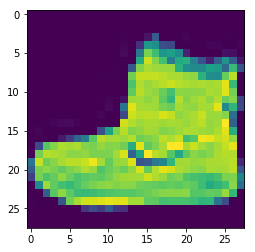

In [30]:
trainset.train_data.shape # existen 6000 imagenes de 28x28
img1=trainset.train_data[0]
plt.imshow(img1) 
n_clases=len(torch.unique(trainset.train_labels))
print("El numero de clases es",n_clases) 

### Mostrar imagen de entrenamiento 

torch.Size([64, 1, 28, 28])
torch.Size([64])


torch.Size([64, 784])

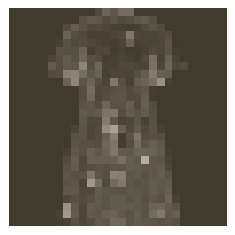

In [32]:
images,labels=next(iter(trainloader))
print(images.shape)
print(labels.shape)
helper.imshow(images[0,:])
x=images.view(images.shape[0],-1)
x.shape

### Construir red

In [25]:
from torch import nn,optim
import torch.nn.functional as F

In [35]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,256)
        self.fc2=nn.Linear(256,128)
        self.fc3=nn.Linear(128,64)
        self.fc4=nn.Linear(64,10)
    def forward(self,x): # x tiene la forma 64 X 1 X 28 X 28
        x=x.view(x.shape[0],-1) # 64 x 748 
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=F.log_softmax(self.fc4(x),dim=1) # log(softmax(x))
        return x

### Entrenar red 

In [43]:
model=Net()  # crear una instacnia de la clase
model

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [45]:
criterion=nn.NLLLoss() # definir funcion de costo

In [49]:
optimizer=optim.Adam(model.parameters(),lr=0.003)  # definir optimizador 
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.003
    weight_decay: 0
)

In [57]:
epochs=1
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        log_ps=model(images) ## or model.forward(images)
        loss=criterion(log_ps,labels)
        optimizer.zero_grad()  ## limpiar optimizador (acumulado)
        loss.backward() # calcular gradientes
        optimizer.step() # actualizar parametros 
        running_loss  += loss.item()        
    else:
        print("Training loss= ", running_loss/len(trainloader))

Training loss=  0.35685293212818947


### Probar red

In [58]:
import helper

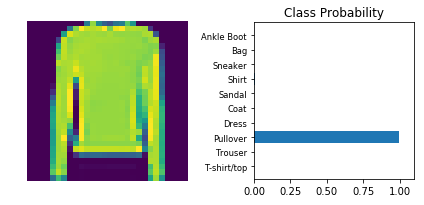

In [65]:
images,labels=next(iter(testloader))
img=images[0]
ps=torch.exp(model(img)) # se utiliza exp debido a que la salida de la red regresa log
helper.view_classify(img,ps,version='Fashion')